# McKinsey hackaton 


In [1]:
import numpy as np                              
import pandas as pd                              
import matplotlib.pyplot as plt                  
import seaborn as sns                            

%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
df_train = pd.read_csv('data/train_data.csv', index_col=['year'], parse_dates=['year'])
df_test = pd.read_csv('data/test_data.csv', index_col=['year'], parse_dates=['year'])

In [3]:
dfs = pd.concat([df_train, df_test])

# теперь разделим как было

train = dfs[:3262]
test = dfs[3263:]

# Посмотрим на данные

In [4]:
train.head()

,robot_gear_compression_diff_1,sensor_robot_controller_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,sensor_robot_arm_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,sensor_robot_eye_laser_range_1,sensor_robot_arm_left_4,sensor_robot_arm_left_2,gamma_ray,target
year,,,,,,,,,,,,,,,,,,,,,
2019,10.679910,15.091173,14.274428,-11.045572,-4.783722,8.581814,13.683193,5.829388,-46.055115,23.933078,...,-19.814141,-25.839817,0.970255,3.238174,1.817238,1.474627,-28.059812,15.631746,low,19.993461
2020,10.611032,14.906948,13.773004,-11.169123,-6.077731,8.336961,13.633622,5.345224,-50.708744,28.812526,...,-0.198837,-7.075529,0.728076,3.004283,1.586136,1.281429,-27.609630,15.848169,low,19.904883
2021,10.186666,14.807848,13.861197,-12.261832,-5.385449,8.208332,14.534426,5.352057,-53.471611,25.629468,...,0.142533,-4.374839,0.397508,3.050232,2.093176,1.791260,-25.408680,16.064592,low,20.422236
2022,10.439354,14.780703,13.735109,-12.940010,-3.136724,8.093524,14.911227,7.367078,-42.954456,28.717202,...,-0.881582,-3.638186,2.683104,3.133879,1.799235,1.588151,-23.169179,16.281016,low,19.872086
2023,10.537853,14.761712,14.112636,-11.648818,-1.120589,8.359302,14.660116,7.028476,-49.266612,29.162689,...,2.963216,-2.100919,0.409917,3.240069,1.315912,0.893747,-22.344542,16.497439,low,19.118784


In [5]:
train.describe()

,robot_gear_compression_diff_1,sensor_robot_controller_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,sensor_robot_arm_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,sensor_robot_eye_laser_sensor_4,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,sensor_robot_eye_laser_range_1,sensor_robot_arm_left_4,sensor_robot_arm_left_2,target
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,...,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,4.748504,4.716578,4.155025,0.736548,0.354468,3.984813,4.802384,3.494826,-11.774255,6.560692,...,-0.314599,-1.618107,-1.230659,-0.369668,-0.967503,-0.351680,-0.102815,-3.167370,-5.768335,3.979347
std,11.969850,12.598370,15.414283,32.496728,21.252066,11.971213,21.787276,23.440838,39.628887,22.633731,...,13.787519,15.731828,15.047807,11.754177,52.015326,25.879880,19.140687,13.069076,48.930353,21.060341
min,-41.222606,-50.708097,-85.115629,-237.802677,-62.005399,-20.918665,-37.047343,-30.209884,-129.428980,-60.284484,...,-260.782205,-204.598022,-267.461044,-171.454268,-700.034237,-350.057140,-259.983389,-45.065021,-260.177848,-222.068373
25%,-4.340348,-5.050637,-5.440247,-11.604670,-14.198070,-3.080059,-7.524009,-7.318171,-37.706402,-11.794973,...,0.528241,-2.885533,-1.410037,-0.300372,3.007133,1.331881,1.089454,-12.712695,-21.939303,-6.428675
50%,11.003404,11.190641,12.673933,2.593479,6.193309,6.780488,10.800171,3.342706,-16.017808,17.068510,...,0.813811,4.115813,2.350871,0.757724,3.105627,1.690435,1.385622,-2.967866,-2.223159,10.092904
75%,14.536580,15.195490,15.872123,23.115659,17.123122,11.241156,16.414207,13.691078,16.567651,23.529041,...,0.956559,6.543786,4.229479,1.646927,3.193195,2.047951,1.675322,6.587931,18.228823,17.295328
max,16.485844,17.096144,20.793896,65.593323,126.019083,122.988116,242.904661,308.146334,112.222819,40.792290,...,1.813343,17.959283,12.010494,3.795320,6.940355,4.374593,51.588361,30.050211,98.218800,25.643372


In [6]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3262 entries, 2019 to 5280
Data columns (total 145 columns):
robot_gear_compression_diff_1        3262 non-null float64
sensor_robot_controller_index_2      3262 non-null float64
robot_gear_compression_diff_3        3262 non-null float64
robot_gear_compression_diff_4        3262 non-null float64
sensor_robot_arm_right_1             3262 non-null float64
robot_gear_compression_diff_6        3262 non-null float64
robot_gear_compression_diff_7        3262 non-null float64
robot_gear_compression_diff_8        3262 non-null float64
robot_gear_compression_diff_9        3262 non-null float64
robot_gear_compression_diff_10       3262 non-null float64
robot_gear_circulation_1             3262 non-null float64
robot_gear_circulation_2             3262 non-null float64
sensor_robot_arm_left_3              3262 non-null float64
sensor_robot_controller_index_5      3262 non-null float64
sensor_robot_controller_index_3      3262 non-null float64
robo

In [7]:
test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 5282 to 6281
Data columns (total 145 columns):
robot_gear_compression_diff_1        1000 non-null float64
sensor_robot_controller_index_2      1000 non-null float64
robot_gear_compression_diff_3        1000 non-null float64
robot_gear_compression_diff_4        1000 non-null float64
sensor_robot_arm_right_1             1000 non-null float64
robot_gear_compression_diff_6        1000 non-null float64
robot_gear_compression_diff_7        1000 non-null float64
robot_gear_compression_diff_8        1000 non-null float64
robot_gear_compression_diff_9        1000 non-null float64
robot_gear_compression_diff_10       1000 non-null float64
robot_gear_circulation_1             1000 non-null float64
robot_gear_circulation_2             1000 non-null float64
sensor_robot_arm_left_3              1000 non-null float64
sensor_robot_controller_index_5      1000 non-null float64
sensor_robot_controller_index_3      1000 non-null float64
robo

In [8]:
train['gamma_ray'].unique()

array(['low', 'moderate', 'high'], dtype=object)

In [9]:
#f, ax = plt.subplots(figsize = (40, 40))
#sns.heatmap(train.corr(), ax=ax, annot=True)

In [10]:
train.corr()['target'][train.corr()['target']>0.7]

sensor_robot_controller_index_2      0.736509
robot_gear_compression_diff_3        0.776565
robot_gear_circulation_1             0.706158
sensor_robot_controller_index_5      0.717541
sensor_robot_controller_index_3      0.716807
robot_gear_circulation_6             0.718363
sensor_robot_jump_power_5            0.839861
robot_gear_circulation_13            0.741737
sensor_robot_arm_left_5              0.718359
robot_gear_compression_1             0.734041
robot_gear_compression_2             0.741457
robot_gear_compression_3             0.749742
sensor_robot_controller_index_4      0.744480
robot_gear_temperature_1             0.737983
robot_gear_temperature_2             0.726634
robot_gear_temperature_3             0.815256
robot_gear_temperature_4             0.826068
sensor_robot_eye_laser_emission_4    0.833534
sensor_robot_arm_right_3             0.776904
sensor_robot_jump_power_1            0.833038
robot_gear_temperature_8             0.815423
robot_gear_temperature_9          

# Preprocessing

In [11]:
def preprocessing(data, train=True):

    data['gamma_ray'] = data['gamma_ray'].replace('low',1).replace('moderate',2).replace('high',3).replace('very high',4)

    #TO DO: раскомментировать строки ниже
    # Пока убрал работу с временными лагами, т.к. не понятно, что делать в момент предикта (нужно всегда будет обновлять двнные предиктом для наполнения лагов следующего шага)
#     #Посмотрим, влияют ли как-то предыдущие значения таргета на последующее (TO DO: попробовать без лага)
#     for i in range(1, 10):
#         data["lag_{}".format(i)] = data.target.shift(i).fillna(0) #первые значения лага заполняем 0 (TO DO: попробовать среднее значение и Nan)

    
    
    if train:
        data = data[data.target > -40]
        target = data['target'] 
        data.drop(columns=['target'], inplace=True)
        sns.distplot(target)
    else:
        if 'target' in data.columns:
            data.drop(columns=['target'], inplace=True)
        target =[]
       
    #Попробуем выделить наиболее кореллированные фичи
    # Дал прирост ~ 15%
    alfa_columns = ['sensor_robot_controller_index_2',
                   'robot_gear_compression_diff_3',
                   'sensor_robot_controller_index_5',
                   'sensor_robot_jump_power_5',
                   'robot_gear_circulation_13',
                   'sensor_robot_arm_left_5',
                   'robot_gear_compression_3',
                   'sensor_robot_controller_index_4',
                   'robot_gear_temperature_4',
                   'sensor_robot_eye_laser_emission_4',
                   'sensor_robot_jump_power_1',
                   'robot_gear_temperature_9',
                   'sensor_robot_eye_laser_sensor_4',
                   'robot_probe_temperature_8',
                   'sensor_robot_eye_laser_range_1',
                   'gamma_ray']
    data = data[alfa_columns]
    
    return data, target

/home/rromanov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rromanov/.local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


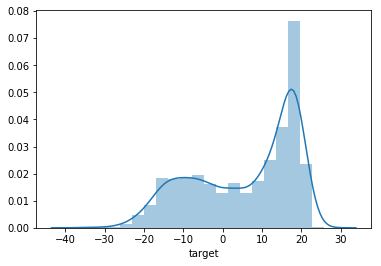

In [12]:
x_train, y_train = preprocessing(train)

In [13]:
x_train.head()

,sensor_robot_controller_index_2,robot_gear_compression_diff_3,sensor_robot_controller_index_5,sensor_robot_jump_power_5,robot_gear_circulation_13,sensor_robot_arm_left_5,robot_gear_compression_3,sensor_robot_controller_index_4,robot_gear_temperature_4,sensor_robot_eye_laser_emission_4,sensor_robot_jump_power_1,robot_gear_temperature_9,sensor_robot_eye_laser_sensor_4,robot_probe_temperature_8,sensor_robot_eye_laser_range_1,gamma_ray
year,,,,,,,,,,,,,,,,
2019,15.091173,14.274428,45.093450,5.396570,15.429362,15.256857,19.201325,25.624383,10.902824,6.318872,2.698838,2.172709,0.956559,3.238174,1.474627,1
2020,14.906948,13.773004,45.905822,6.702377,15.308233,14.686961,19.264636,25.751298,10.032697,5.339663,2.263321,1.815992,0.385419,3.004283,1.281429,1
2021,14.807848,13.861197,45.369842,5.508496,15.318158,14.879412,19.866160,25.497469,11.540593,5.924689,2.806391,2.407585,0.528241,3.050232,1.791260,1
2022,14.780703,13.735109,45.616807,4.795105,15.420816,14.883513,19.074703,26.765560,7.362134,6.337613,2.418084,2.188190,0.813811,3.133879,1.588151,1
2023,14.761712,14.112636,45.884321,4.004761,15.506723,14.943540,18.821461,26.194972,8.772301,5.514890,2.214789,2.329131,0.385419,3.240069,0.893747,1


# Обучение модели 

In [14]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(X)*(1-test_size))
    
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [15]:
X_tr, X_te, y_tr, y_te = timeseries_train_test_split(x_train, y_train, test_size=0.3)

In [16]:
X_tr.shape, X_te.shape

((2257, 16), (968, 16))

## ElasticNet

In [57]:
en = ElasticNet(max_iter=50000)

In [58]:
model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('net', en)
])

In [59]:
alpha_range = np.logspace(-3, 5, 5)
print(alpha_range)
# param_grid = {'elastic__alpha':[0.01, 0.1, 1, 10, 100, 1000],
param_grid = {'net__alpha':alpha_range,
              'net__l1_ratio':[0.001, 0.01, 0.1, 1, 10, 100]}


[  1.00000000e-03   1.00000000e-01   1.00000000e+01   1.00000000e+03
   1.00000000e+05]


In [60]:
grid = GridSearchCV(model, param_grid=param_grid, cv=5,n_jobs=4)
grid.fit(X_tr, y_tr)

grid.best_score_

/home/rromanov/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/rromanov/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rromanov/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


-1.5380087274855763

## XGBoost

In [17]:
xgb = XGBRegressor()
xgb.fit(X_tr, y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
cross_val_score(
    xgb,
    X_te,
    y_te,
    scoring='r2',
    cv=10
)

array([ 0.88196199,  0.80595727,  0.88501316,  0.77173891,  0.87508061,
        0.83564674,  0.82392411,  0.85682485,  0.85345195,  0.81752217])

## Формируем результаты

In [19]:
X_test,_ = preprocessing(test, train=False)

/home/rromanov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rromanov/.local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
X_test.head()

,sensor_robot_controller_index_2,robot_gear_compression_diff_3,sensor_robot_controller_index_5,sensor_robot_jump_power_5,robot_gear_circulation_13,sensor_robot_arm_left_5,robot_gear_compression_3,sensor_robot_controller_index_4,robot_gear_temperature_4,sensor_robot_eye_laser_emission_4,sensor_robot_jump_power_1,robot_gear_temperature_9,sensor_robot_eye_laser_sensor_4,robot_probe_temperature_8,sensor_robot_eye_laser_range_1,gamma_ray
year,,,,,,,,,,,,,,,,
5282,-18.926809,-20.810190,-53.402738,-11.454246,-28.071315,-16.906210,-29.772577,-47.922514,-17.628065,-2.622068,-2.388320,-1.340034,0.385419,3.212842,1.223251,3
5283,-22.085946,-26.493563,-65.937293,-13.297025,-27.890532,-20.322096,-34.552900,-59.017957,-21.181720,-4.907513,-3.184898,-2.080165,0.385419,3.236609,0.855648,3
5284,-23.746999,-28.380429,-68.981608,-16.134529,-28.175933,-21.413509,-39.048180,-66.393766,-32.378758,-10.342979,-5.643865,-5.121756,0.813811,3.092737,1.206389,3
5285,-23.812049,-28.283436,-69.120439,-15.998331,-28.082189,-21.115360,-39.048253,-65.358205,-33.480807,-11.273150,-5.707390,-4.717701,1.099381,3.055166,1.559834,3
5286,-24.002717,-29.013752,-71.335468,-16.576532,-28.071759,-22.168340,-39.174874,-68.591715,-25.563965,-7.947276,-4.515407,-3.799462,0.813811,3.124018,1.660488,3


In [23]:
y_test = xgb.predict(X_test)

In [24]:
X_test['target']=y_test

/home/rromanov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
X_test.head()

,sensor_robot_controller_index_2,robot_gear_compression_diff_3,sensor_robot_controller_index_5,sensor_robot_jump_power_5,robot_gear_circulation_13,sensor_robot_arm_left_5,robot_gear_compression_3,sensor_robot_controller_index_4,robot_gear_temperature_4,sensor_robot_eye_laser_emission_4,sensor_robot_jump_power_1,robot_gear_temperature_9,sensor_robot_eye_laser_sensor_4,robot_probe_temperature_8,sensor_robot_eye_laser_range_1,gamma_ray,target
year,,,,,,,,,,,,,,,,,
5282,-18.926809,-20.810190,-53.402738,-11.454246,-28.071315,-16.906210,-29.772577,-47.922514,-17.628065,-2.622068,-2.388320,-1.340034,0.385419,3.212842,1.223251,3,-15.045280
5283,-22.085946,-26.493563,-65.937293,-13.297025,-27.890532,-20.322096,-34.552900,-59.017957,-21.181720,-4.907513,-3.184898,-2.080165,0.385419,3.236609,0.855648,3,-16.047741
5284,-23.746999,-28.380429,-68.981608,-16.134529,-28.175933,-21.413509,-39.048180,-66.393766,-32.378758,-10.342979,-5.643865,-5.121756,0.813811,3.092737,1.206389,3,-22.317377
5285,-23.812049,-28.283436,-69.120439,-15.998331,-28.082189,-21.115360,-39.048253,-65.358205,-33.480807,-11.273150,-5.707390,-4.717701,1.099381,3.055166,1.559834,3,-22.345768
5286,-24.002717,-29.013752,-71.335468,-16.576532,-28.071759,-22.168340,-39.174874,-68.591715,-25.563965,-7.947276,-4.515407,-3.799462,0.813811,3.124018,1.660488,3,-22.703426


In [26]:
result =X_test['target']

In [27]:
result.to_csv('result_xgb.csv', header=True)